In [ ]:
!pip install stable-baselines3 gym

In [ ]:
!pip install alpaca-py

In [ ]:
!pip install finta

In [1]:
# Gym stuff
import gym
from turtle_1 import TurtleTradingEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike


# Processing libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Quant Finance
from finta import TA
import quantstats as qs

In [3]:
# from a list of keys we take the first one - '/n'
api_key = 'PK1VFQOXMCUAWJSKYN58'
secret_key = 'HDvRZiY9PGHSGHYKTXxSr94fODo3MLyZKOdXNtbP'

In [4]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

client = StockHistoricalDataClient(api_key=api_key, secret_key=secret_key)


request_params = StockBarsRequest(
                        symbol_or_symbols="IBM",       
                        timeframe=TimeFrame.Hour,
                        start="2018-01-01 00:00:00",
                        end="2023-01-01 00:00:00"
                        
                 )

bars = client.get_stock_bars(request_params)
print(bars)

data={'IBM': [{   'close': 153.74,
    'high': 153.74,
    'low': 153.74,
    'open': 153.74,
    'symbol': 'IBM',
    'timestamp': datetime.datetime(2018, 1, 2, 11, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 1.0,
    'volume': 100.0,
    'vwap': 153.74}, {   'close': 153.8,
    'high': 153.8,
    'low': 153.5,
    'open': 153.5,
    'symbol': 'IBM',
    'timestamp': datetime.datetime(2018, 1, 2, 12, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 12.0,
    'volume': 565.0,
    'vwap': 153.606452}, {   'close': 153.96,
    'high': 154.0,
    'low': 153.96,
    'open': 154.0,
    'symbol': 'IBM',
    'timestamp': datetime.datetime(2018, 1, 2, 13, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 11.0,
    'volume': 1229.0,
    'vwap': 153.995708}, {   'close': 154.7,
    'high': 154.72,
    'low': 154.01,
    'open': 154.24,
    'symbol': 'IBM',
    'timestamp': datetime.datetime(2018, 1, 2, 14, 0, tzinfo=TzInfo(UTC)),
    'trade_count': 4499.0,
    'volume': 587883.0,
    'vwap': 154.450105}, {   

In [5]:
data = bars.df
data = data.droplevel(0)
data.head()

open    high      low   close    volume  \
timestamp                                                              
2018-01-02 11:00:00+00:00  153.74  153.74  153.740  153.74     100.0   
2018-01-02 12:00:00+00:00  153.50  153.80  153.500  153.80     565.0   
2018-01-02 13:00:00+00:00  154.00  154.00  153.960  153.96    1229.0   
2018-01-02 14:00:00+00:00  154.24  154.72  154.010  154.70  587883.0   
2018-01-02 15:00:00+00:00  154.62  154.81  154.175  154.30  526118.0   

                           trade_count        vwap  
timestamp                                           
2018-01-02 11:00:00+00:00          1.0  153.740000  
2018-01-02 12:00:00+00:00         12.0  153.606452  
2018-01-02 13:00:00+00:00         11.0  153.995708  
2018-01-02 14:00:00+00:00       4499.0  154.450105  
2018-01-02 15:00:00+00:00       5896.0  154.409312

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15993 entries, 2018-01-02 11:00:00+00:00 to 2022-12-30 22:00:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         15993 non-null  float64
 1   high         15993 non-null  float64
 2   low          15993 non-null  float64
 3   close        15993 non-null  float64
 4   volume       15993 non-null  float64
 5   trade_count  15993 non-null  float64
 6   vwap         15993 non-null  float64
dtypes: float64(7)
memory usage: 999.6 KB


In [6]:
data = data.rename(columns = {'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from finta import TA

# Example Data (Assuming 'data' already has OHLCV columns)
data['RSI'] = TA.RSI(data, 16)
data['SMA'] = TA.SMA(data, 10)
data['OBV'] = TA.OBV(data)
data['EMA'] = TA.EMA(data, 20)
data['MACD'] = TA.MACD(data)['MACD']
data['ATR'] = TA.ATR(data, 14)
data['CCI'] = TA.CCI(data, 20)


ichimoku = TA.ICHIMOKU(data)

# Convert it into separate columns
#data['Tenkan_sen'] = ichimoku['TENKAN']
#data['Kijun_sen'] = ichimoku['KIJUN']
#data['Chikou_span'] = ichimoku['CHIKOU']



# Fill NaN values (optional)
data.fillna(0, inplace=True)

# Compute correlation matrix
correlation_matrix = data[['RSI', 'SMA', 'EMA', 'MACD', 'ATR', 'CCI']].corr()
                           #, 'Tenkan_sen', 'Kijun_sen', 'Chikou_span']].corr()

# Display correlation matrix
print(correlation_matrix)


           RSI       SMA       EMA      MACD       ATR       CCI
RSI   1.000000 -0.049349  0.136388  0.755850 -0.291413  0.806142
SMA  -0.049349  1.000000  0.536853  0.242804 -0.073267 -0.023210
EMA   0.136388  0.536853  1.000000  0.191587 -0.294490 -0.054663
MACD  0.755850  0.242804  0.191587  1.000000 -0.435138  0.530904
ATR  -0.291413 -0.073267 -0.294490 -0.435138  1.000000 -0.181858
CCI   0.806142 -0.023210 -0.054663  0.530904 -0.181858  1.000000


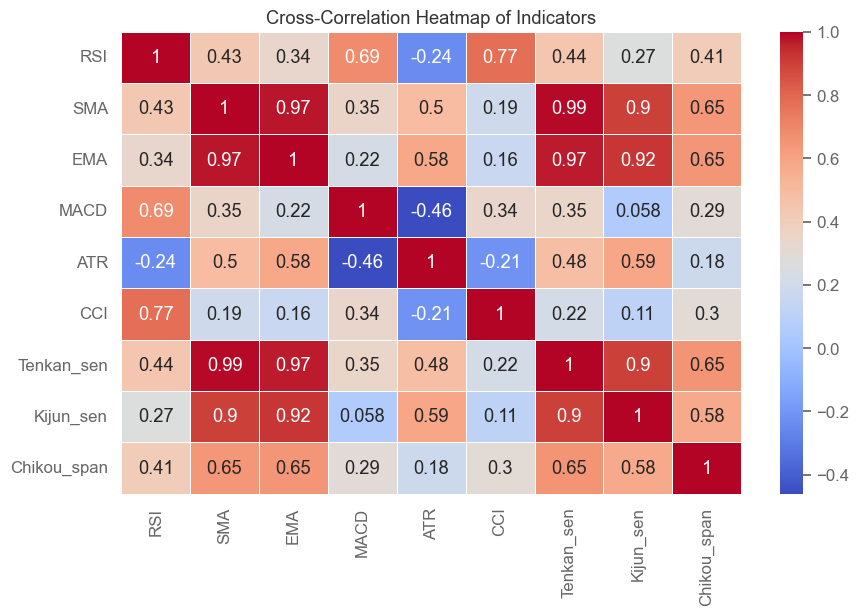

In [35]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Cross-Correlation Heatmap of Indicators")
plt.show()


In [ ]:
data.head(100)

In [8]:
# Get prices and signal features from your DataFrame
prices = data['Close'].values
signal_features = data[['Open', 'High', 'Low', 'Volume', 'RSI', 'SMA', 'OBV', 'EMA', 'MACD', 'ATR', 'CCI']].values


In [9]:
from stable_baselines3.common.vec_env import DummyVecEnv
from turtle_1 import TurtleTradingEnv

window_size = 65
start_index = window_size
end_index = round(len(prices) * 0.8)

from turtle_1 import TurtleTradingEnv

env = DummyVecEnv([
    lambda: TurtleTradingEnv(
        prices=prices,
        signal_features=signal_features,
        window_size=65,
        frame_bound=(65, int(len(prices) * 0.8))
    )
])



c:\Users\emiro\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [10]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv


# Initialize model
model = DQN('MlpPolicy', env, verbose=1,
            learning_rate=0.0003,
            #n_steps=2048,
            batch_size=64,
            #n_epochs=10,
            gamma=0.99,
            #gae_lambda=0.95,
            #clip_range=0.2,
            #ent_coef=0.01)
)
# Train
model.learn(total_timesteps=100000)


Using cpu device
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle BUY rule not triggered
❌ SELL FAILED: Tried 1, Only Have 0
❌ SELL FAILED: Tried 2, Only Have 0
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ SELL FAILED: Tried 2, Only Have 0
❌ SELL FAILED: Tried 1, Only Have 0
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not t

In [30]:
model.save("xx")

Testing

In [27]:

client = StockHistoricalDataClient(api_key=api_key, secret_key=secret_key)


request_params = StockBarsRequest(
                        symbol_or_symbols="KO",       
                        timeframe=TimeFrame.Hour,
                        start="2019-01-01 00:00:00",
                        end="2023-01-01 00:00:00"
                        
                 )

bar = client.get_stock_bars(request_params)


new_data = bar.df
new_data = new_data.droplevel(0)

new_data = new_data.rename(columns = {'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})

new_data['RSI'] = TA.RSI(new_data, 16)
new_data['SMA'] = TA.SMA(new_data, 10)
new_data['OBV'] = TA.OBV(new_data)
new_data['EMA'] = TA.EMA(new_data, 20)
new_data['MACD'] = TA.MACD(new_data)['MACD']
new_data['ATR'] = TA.ATR(new_data, 14)
new_data['CCI'] = TA.CCI(new_data, 20)


# Fill NaN values (optional)
new_data.fillna(0, inplace=True)



new_prices = new_data['Close'].values
new_signal_features = new_data[['Open', 'High', 'Low', 'Volume', 'RSI', 'SMA', 'OBV', 'EMA', 'MACD', 'ATR', 'CCI']].values



In [28]:
# Create raw env
test_env = TurtleTradingEnv(
    prices=new_prices,
    signal_features=new_signal_features,
    window_size=65,
    frame_bound=(65, len(new_prices))
)

obs = test_env.reset()
done = False
total_reward = 0
prices_plot = []
actions_plot = []

while not done:
    if len(obs.shape) == 1:
        obs = obs[np.newaxis, ...]

    action, _ = model.predict(obs, deterministic=False)
    obs, reward, done, _ = test_env.step(action)

    total_reward += reward
    actions_plot.append(action)
    prices_plot.append(test_env.prices[test_env.current_step])


❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ SELL FAILED: Tried 2, Only Have 0
❌ SELL FAILED: Tried 2, Only Have 0
❌ SELL FAILED: Tried 2, Only Have 0
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ SELL FAILED: Tried 2, Only Have 0
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ SELL FAILED: Tried 2, Only Have 0
❌ Turtle SELL rule not triggered
❌ SELL FAILED: Tried 2, Only Have 0
❌ Turtle SELL rule not triggered
❌ Turtle BUY rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not triggered
❌ Turtle SELL rule not tri

✅ Final Portfolio Value: 10000.28
🏆 Total Reward: -3643.32


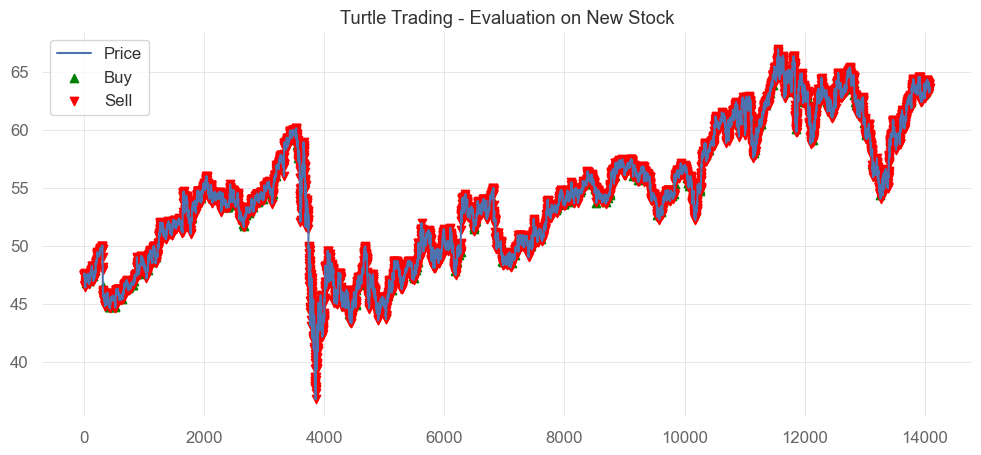

In [29]:
final_price = test_env.prices[test_env.current_step]
final_value = test_env._get_portfolio_value(final_price)

print(f"✅ Final Portfolio Value: {final_value:.2f}")
print(f"🏆 Total Reward: {total_reward:.2f}")

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(prices_plot, label='Price')

buy_idxs = [i for i, a in enumerate(actions_plot) if a in [1, 2]]
sell_idxs = [i for i, a in enumerate(actions_plot) if a in [3, 4]]

plt.scatter(buy_idxs, [prices_plot[i] for i in buy_idxs], color='green', marker='^', label='Buy')
plt.scatter(sell_idxs, [prices_plot[i] for i in sell_idxs], color='red', marker='v', label='Sell')

plt.title("Turtle Trading - Evaluation on New Stock")
plt.legend()
plt.grid(True)
plt.show()


FİNİSHED

In [ ]:
#Create a function to properly format data frame to be passed through environment
def signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Open', 'High', 'Low', 'Volume', 'trade_count', 'vwap',
        'RSI', 'SMA', 'OBV', 'EMA', 'MACD', 'ATR', 'CCI',
        'Tenkan_sen', 'Kijun_sen', 'Chikou_span']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv


window_size = 65
start_index = window_size
end_index = round(len(prices) * 0.8)

env = DummyVecEnv([
    lambda: TurtleTradingEnv(prices, signal_features, window_size=window_size, frame_bound=(start_index, end_index))
])


In [ ]:
#Replace default data process with custom function from above
class MyCustomEnv(TurtleTradingEnv):
    _process_data = signals

#Initialize an environment setting the window size and train data
window_size = 65
start_index = window_size
end_train_index = round(len(data)*0.80)
end_val_index = len(data)

env2 = MyCustomEnv(df=prices, window_size=window_size, frame_bound=(start_index, end_train_index))

In [ ]:
#Create a Dummy Vector of our environment
env_maker = lambda: env
env = DummyVecEnv([env_maker])

In [ ]:
!pip install stable-baselines3[extra] torch torchvision torchaudio --upgrade


In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Torch CUDA Version:", torch.version.cuda)
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")



In [ ]:
#initialize our model and train
import torch
from stable_baselines3 import A2C
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.utils import get_device

# Check available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Wrap env in vectorized form (SB3 requires this)
env = DummyVecEnv([lambda: MyCustomEnv(df=data, window_size=window_size, frame_bound=(start_index, end_train_index))])

# Specify policy kwargs with optimizer
policy_kwargs = dict(optimizer_class=torch.optim.RMSprop, optimizer_kwargs=dict(eps=1e-5))

# Initialize A2C with GPU
actor_critic = A2C('MlpPolicy', env, policy_kwargs=policy_kwargs, verbose=1, device=device)

# Train the model
actor_critic.learn(total_timesteps=100000)

In [ ]:
#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=window_size, frame_bound=(end_train_index, end_val_index))
obs = env.reset()

obs[0].shape

In [ ]:
env.action_space

In [ ]:
while True:
    # Eğer obs bir tuple ise 0. elemanı al
    if isinstance(obs, tuple):
        obs = obs[0]

    # Gözlem şekli kontrolü ve düzeltmesi
    if len(obs.shape) == 1:
        obs = obs[np.newaxis, ...]

    # Aksiyon tahmini ve çevre adımı
    action, _states = actor_critic.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    # Döngüyü sonlandırma kontrolü
    if terminated or truncated:
        print("Episode finished:", info)
        break

In [ ]:
#Plot the results
plt.figure(figsize=(16,9))
env.render_all()
plt.show()

In [ ]:
actor_critic.save("dumenden_ppo_MODELI_NVDA")

In [ ]:
#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=window_size, frame_bound=(end_train_index, end_val_index))
obs = env.reset()

obs[0].shape

In [ ]:
while True:
    # Eğer obs bir tuple ise 0. elemanı al
    if isinstance(obs, tuple):
        obs = obs[0]

    # Gözlem şekli kontrolü ve düzeltmesi
    if len(obs.shape) == 1:
        obs = obs[np.newaxis, ...]

    # Aksiyon tahmini ve çevre adımı
    action, _states = actor_critic.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)

    # Döngüyü sonlandırma kontrolü
    if terminated or truncated:
        print("Episode finished:", info)
        break


In [ ]:
#Plot the results
plt.figure(figsize=(16,9))
env.render_all()
plt.show()